In [103]:
import pandas as pd
import numpy as np
import plotly.express as px

import warnings
warnings.simplefilter(action='ignore')

In [22]:
demog = pd.read_csv('m5_survey_data_demographics.csv')
tech = pd.read_csv('m5_survey_data_technologies_normalised.csv')
job = pd.read_excel('01_job_postings.xlsx')
salary = pd.read_csv('04_popular-languages.csv')

In [3]:
df_demog = demog.copy()
df_tech = tech.copy()
df_job = job.copy()
df_salary = salary.copy()

In [4]:
df_demog.ConvertedComp.median()

57745.0

In [5]:
df_demog.shape

(11398, 70)

In [6]:
df_tech.shape

(74590, 14)

In [7]:
df_demog.head(1)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy


In [8]:
df_tech.head(2)

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,C,C,MySQL,MySQL,Linux,Linux,NaN,NaN,Eclipse,NaN,NaN,NaN,NaN


In [9]:
df_job.head(2)

,Technology,Location,Num_of_Jobs
0,C,San Francisco,214
1,C,Philadelphia,20


In [10]:
# From url 
df_salary.head(20).sort_values(by='Average Annual Salary', ascending=False)

,0,Language,Average Annual Salary
9,10,Go,"$94,082"
2,3,R,"$92,037"
6,7,C#,"$88,726"
8,9,SQL,"$84,793"
7,8,PHP,"$84,727"
4,5,Swift,"$130,801"
0,1,Python,"$114,383"
5,6,C++,"$113,865"
3,4,Javascript,"$110,981"
1,2,Java,"$101,013"


In [11]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   0                      10 non-null     int64 
 1   Language               10 non-null     object
 2   Average Annual Salary  10 non-null     object
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [12]:
df_salary['Salary'] = df_salary['Average Annual Salary'].str.replace('$', '').str.replace(',', '').astype(int)
df_salary.head(20).sort_values(by='Salary', ascending=False)

,0,Language,Average Annual Salary,Salary
4,5,Swift,"$130,801",130801
0,1,Python,"$114,383",114383
5,6,C++,"$113,865",113865
3,4,Javascript,"$110,981",110981
1,2,Java,"$101,013",101013
9,10,Go,"$94,082",94082
2,3,R,"$92,037",92037
6,7,C#,"$88,726",88726
8,9,SQL,"$84,793",84793
7,8,PHP,"$84,727",84727


In [13]:
df_job.groupby('Location')['Num_of_Jobs'].sum().reset_index().sort_values(by='Num_of_Jobs').head()

,Location,Num_of_Jobs
9,Philadelphia,26
0,Austin,303
10,San Francisco,305
6,Los Angeles,400
7,New Orleons,605


In [14]:
df_job.groupby('Technology')['Num_of_Jobs'].sum().reset_index().sort_values(by='Num_of_Jobs').head()

,Technology,Num_of_Jobs
6,MySQL Server,0
8,PostgreSQLappend,0
11,Scala,33
5,MongoDB,174
10,SQL Server,250


In [48]:
df_jobs = pd.read_csv('jobs.csv')
top10_Laguages = ['JavaScript', 'Html', 'SQL', 'Bash', 'Python', 'Java', 'C#', 'Typescript', 'PHP', 'C+\+', 'C']
d = {'Language' : [] , 'Num_of_Jobs' : []}
for i in top10_Laguages:
    d['Language'] += [i]
    d['Num_of_Jobs'] += [df_jobs.loc[df_jobs['Key Skills'].str.contains(i), ['Key Skills']].count()[0]]
    #print(i , df_jobs.loc[df_jobs['Key Skills'].str.contains(i), ['Key Skills']].count()[0])
pd.DataFrame(data=d).sort_values(by= 'Num_of_Jobs', ascending=False)

,Language,Num_of_Jobs
10,C,13498
2,SQL,2636
5,Java,2609
4,Python,1173
8,PHP,647
0,JavaScript,355
6,C#,333
9,C+\+,305
1,Html,164
3,Bash,25


In [18]:
df_new = df_jobs['Key Skills'].str.split('|', expand= True)
df_new.rename(columns = lambda x : 'a' + str(x), inplace=True)
for i in df_new.columns:
    df_new[i] = df_new[i].str.lower()
    df_new[i] = df_new[i].str.strip()
df_new.head(2)

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35
0,media planning,digital media,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,pre sales,closing,software knowledge,clients,requirements,negotiating,client,online bidding,good communication,technology,...,None,None,None,None,None,None,None,None,None,None


In [19]:
df_new.shape

(27005, 36)

In [91]:
# For Job 'C' .contains function doesn't work:
L=[]
top10_Laguages = ['javascript', 'html', 'sql', 'bash', 'python', 'java', 'typescript', 'php', 'c#', 'c+\+', 'c']
for i in df_new.columns:
    j= 'html'
    index = df_new.loc[df_new[i] == j].index
    for i in index:
        L.append(i)
print(j, len(set(L)))

html 1531


In [99]:
# For Job 'C' .contains function doesn't work:

top10_Laguages = ['html','javascript', 'sql', 'bash', 'python', 'java', 'typescript', 'php', 'c#', 'c++', 'c']
for j in top10_Laguages:
    L=[]
    for i in df_new.columns:
        index = df_new.loc[df_new[i] == j].index
        for i in index:
            L.append(i)
    print(j, len(set(L)))


html 1531
javascript 2241
sql server 310
python 1165
java 1209
typescript 2
php 728
c# 487
c++ 496
c 817


In [14]:
df_new[df_new['a0'].str.match('c')].a0

2           computer science
6           channel partners
17                 copyright
18                        c#
21       contract management
                ...         
26958        computer skills
26961       customer service
26974        content writing
26997                    c++
27002              counselor
Name: a0, Length: 3625, dtype: object

In [104]:
top10_Laguages = ['javascript', 'html', 'sql', 'bash', 'python', 'java', 'typescript', 'php', 'c#', 'c+\+', 'c']
new_list = filter(lambda x: x != 'sql', top10_Laguages)
list(new_list)

['javascript',
 'html',
 'bash',
 'python',
 'java',
 'typescript',
 'php',
 'c#',
 'c+\\+',
 'c']

In [108]:
L=[]
top10_Laguages = ['javascript', 'html', 'sql', 'bash', 'python', 'java', 'typescript', 'php', 'c#', 'c+\+', 'c']
for j in top10_Laguages:
    for i in df_new.columns:
        new_list = filter(lambda x: x != j, top10_Laguages)
        list(new_list)
        index = df_new.loc[df_new[i].str.contains(j, na=False)& (df_new[i].apply(lambda val: all(s not in str(val) for s in (list(new_list)) )))].index
        for i in index:
            L.append(i)
    print(j, len(set(L)))

javascript 2248
html 2768
sql 4707
bash 4725
python 5235
java 5909
typescript 5909
php 6053
c# 6172
c+\+ 6327
c 25390


In [72]:
for i in L:
    if i not in L2:
        print(i)

'\nfor i in L:\n    if i not in L2:\n        print(i)\n'

In [17]:
L2 = df_jobs.loc[df_jobs['Key Skills'].str.contains('JavaScript')].index
print(len(L2))
L2.difference(L)

355


Int64Index([], dtype='int64')

In [18]:
df_jobs.loc[43, ['Key Skills']]

Key Skills    javascript| sql| php| php mysql| css| software...
Name: 43, dtype: object

In [19]:
df_jobs.head(1)

,Id,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,0,Digital Media Planner,5 - 10 yrs,Media Planning| Digital Media,Advertising,Los Angeles,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager


In [20]:
df_job.groupby('Technology')['Num_of_Jobs'].sum().reset_index().sort_values(by='Num_of_Jobs')

,Technology,Num_of_Jobs
6,MySQL Server,0
8,PostgreSQLappend,0
11,Scala,33
5,MongoDB,174
10,SQL Server,250
2,C++,305
1,C#,333
4,JavaScript,355
7,Oracle,784
9,Python,1173


In [21]:
'''
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install mitosheet
'''

'\n# Install a pip package in the current Jupyter kernel\nimport sys\n!{sys.executable} -m pip install mitosheet\n'

In [22]:
import mitosheet

In [23]:
mitosheet.sheet(df_new, analysis_to_replay="id-nbfhkxiiwc")

MitoWidget(analysis_data_json='{"analysisName": "id-nbfhkxiiwc", "analysisToReplay": null, "code": [], "stepSu…

In [ ]:
from mitosheet import *; register_analysis("id-nbfhkxiiwc");
    
# Filtered a0
df_new = df_new[(df_new['a0'].str.contains('javascript', na=False)) & (df_new['a0'].apply(lambda val: all(s not in str(val) for s in ['sql', 'asd'])))]


In [52]:
df_tech.head(2)

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,C,C,MySQL,MySQL,Linux,Linux,NaN,NaN,Eclipse,NaN,NaN,NaN,NaN


In [48]:
import plotly.express as px

In [62]:
df_tech.head()

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,C,C,MySQL,MySQL,Linux,Linux,NaN,NaN,Eclipse,NaN,NaN,NaN,NaN
2,4.0,C++,C#,SQLite,SQLite,Windows,Windows,NaN,NaN,Vim,NaN,NaN,NaN,NaN
3,4.0,C#,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio,NaN,NaN,NaN,NaN
4,4.0,Python,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio Code,NaN,NaN,NaN,NaN


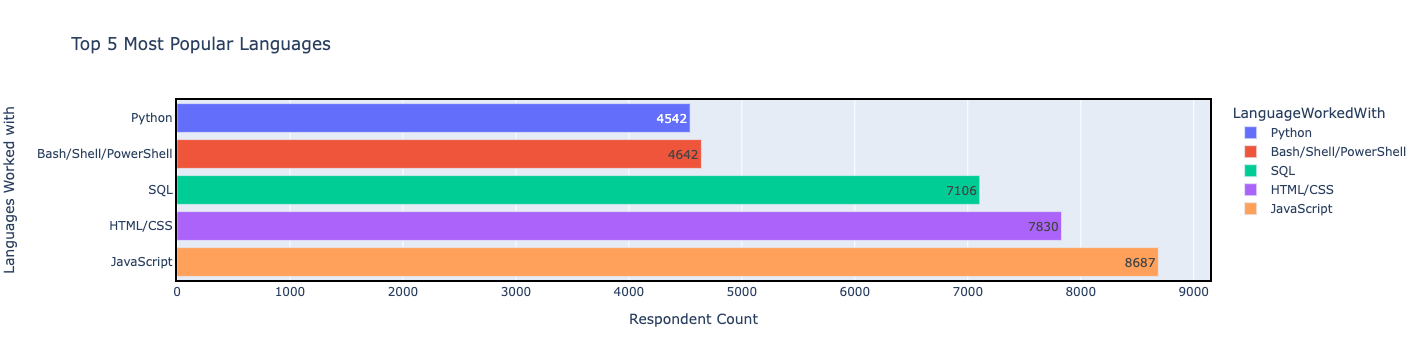

In [227]:
fig = px.bar(df_tech.groupby('LanguageWorkedWith')['Respondent'].count().reset_index(name='count').sort_values(by='count').tail(5)
             , y='LanguageWorkedWith' , x='count', color='LanguageWorkedWith', text='count', orientation='h', title='Top 5 Most Popular Languages')
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, title='Respondent Count')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, title='Languages Worked with')
fig.show()

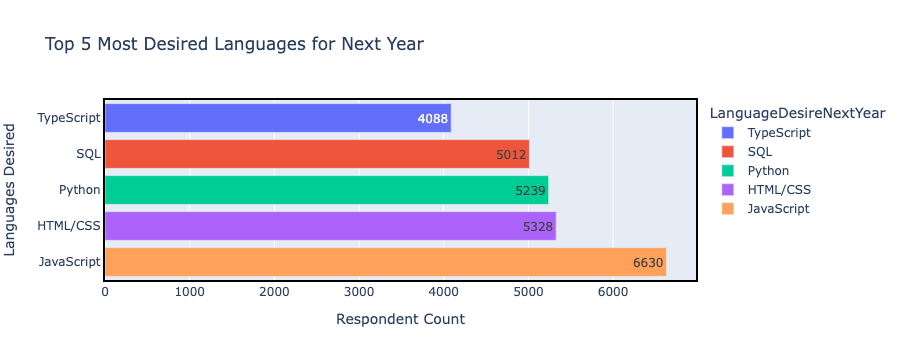

In [228]:
fig = px.bar(df_tech.groupby('LanguageDesireNextYear')['Respondent'].count().reset_index(name='count').sort_values(by='count').tail(5)
             , y='LanguageDesireNextYear' , x='count', color='LanguageDesireNextYear', text='count', orientation='h', title='Top 5 Most Desired Languages for Next Year')
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, title='Respondent Count')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, title='Languages Desired')
fig.show()

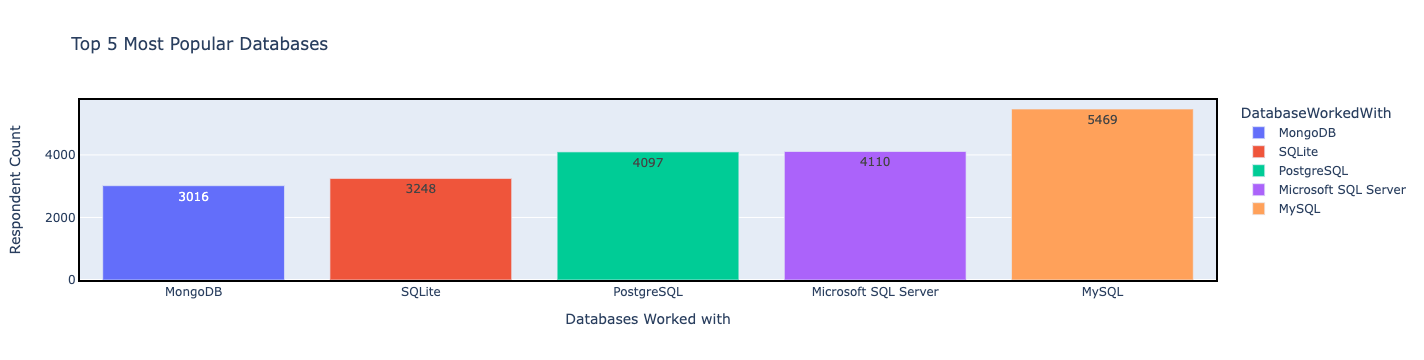

In [230]:
fig = px.bar(df_tech.groupby('DatabaseWorkedWith')['Respondent'].count().reset_index(name='count').sort_values(by='count').tail(5)
             , x='DatabaseWorkedWith' , y='count', color='DatabaseWorkedWith', text='count', title='Top 5 Most Popular Databases')
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, title= 'Databases Worked with')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, title='Respondent Count')
fig.show()

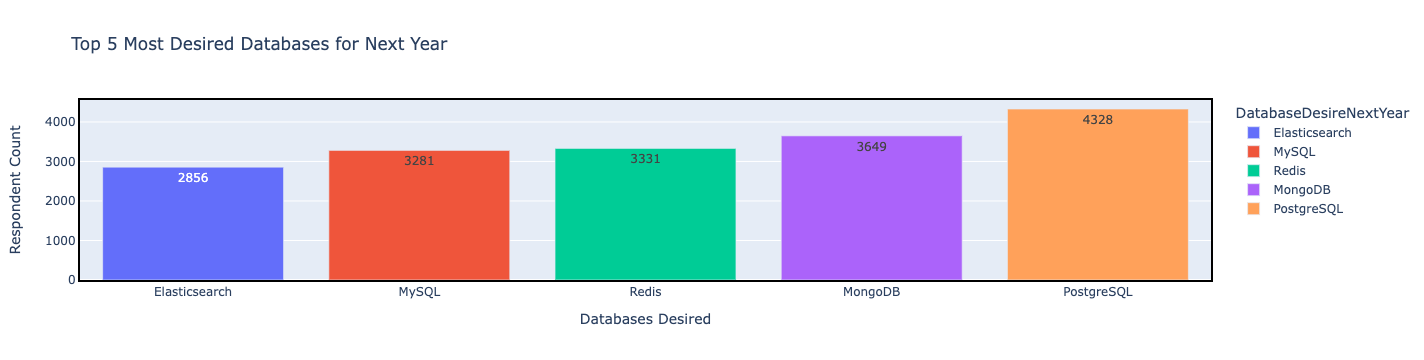

In [229]:
fig = px.bar(df_tech.groupby('DatabaseDesireNextYear')['Respondent'].count().reset_index(name='count').sort_values(by='count').tail(5)
             , x='DatabaseDesireNextYear' , y='count', color='DatabaseDesireNextYear', text='count', title='Top 5 Most Desired Databases for Next Year')
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, title= 'Databases Desired')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, title='Respondent Count')
fig.show()

In [123]:
df_demog.Age.median()

29.0

In [128]:
df_demog.ConvertedComp.mean()

131596.7316197316

In [127]:
df_demog.ConvertedComp.median()

57745.0

In [129]:
df_demog.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004068
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006968
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105418
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036521
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020478
Age,0.004068,0.006968,0.105418,0.036521,-0.020478,1.000000


<AxesSubplot:>

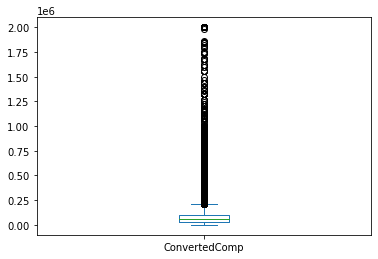

In [131]:
df_demog.ConvertedComp.plot(kind='box')

In [132]:
df_demog.ConvertedComp.describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [147]:
q1 = df_demog.ConvertedComp.describe()[4]
q3 = df_demog.ConvertedComp.describe()[6]
intr_qr = q3 - q1 
max = q3 + (1.5 * intr_qr)
min = q1 - (1.5 * intr_qr)

df_demog.loc[df_demog.ConvertedComp < min, 'ConvertedComp'] = np.nan
df_demog.loc[df_demog.ConvertedComp > max, 'ConvertedComp'] = np.nan

df_demog.ConvertedComp.median()

52704.0

In [149]:
df_demog.ConvertedComp.isna().sum()

1695

In [150]:
df_demog.shape[0] - df_demog.ConvertedComp.isna().sum()

9703

In [156]:
df_demog.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004068
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006968
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105418
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036521
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020478
Age,0.004068,0.006968,0.105418,0.036521,-0.020478,1.000000


In [158]:
def outlier_equal_zero(df, col):
    q1 = df[col].describe()[4]
    q3 = df[col].describe()[6]
    intr_qr = q3 - q1 
    max = q3 + (1.5 * intr_qr)
    min = q1 - (1.5 * intr_qr)

    df.loc[df[col] < min, col] = np.nan
    df.loc[df[col] > max, col] = np.nan

    return df[col].median()

In [159]:
outlier_equal_zero(df_demog, 'ConvertedComp')

52704.0

In [162]:
df_demog.groupby('Gender')['Respondent'].count()

Gender
Man                                                            10480
Man;Non-binary, genderqueer, or gender non-conforming             26
Non-binary, genderqueer, or gender non-conforming                 63
Woman                                                            731
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Woman;Non-binary, genderqueer, or gender non-conforming           14
Name: Respondent, dtype: int64

In [165]:
df_demog.ConvertedComp.loc[df_demog.Gender == 'Man'].median()

52339.0

In [166]:
df_demog.ConvertedComp.loc[df_demog.Gender == 'Woman'].median()

54956.0

In [167]:
df_demog.ConvertedComp.isna().sum()

1695

In [181]:
import seaborn as sns
sns.set_theme(style="darkgrid")

<AxesSubplot:title={'center':'Histogram of Total Annual Compensation (USD)'}, xlabel='ConvertedComp', ylabel='Count'>

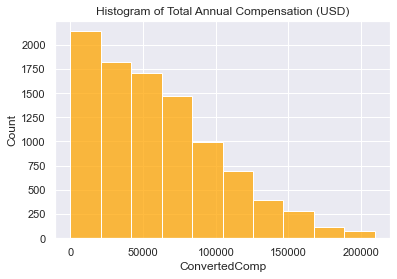

In [189]:
fig = sns.histplot(df_demog.ConvertedComp, bins=10, color='orange')
fig.set(title='Histogram of Total Annual Compensation (USD)')
fig.figure.savefig('hist_converted_comp.png')
fig

In [55]:
df_demog.Hobbyist.value_counts(normalize=True)

Yes    0.813564
No     0.186436
Name: Hobbyist, dtype: float64

In [101]:
df_salary['Salary'] = df_salary['Average Annual Salary'].str.replace('$', '').str.replace(',', '').astype(int)
df_salary.head(20).sort_values(by='Salary', ascending=False)

,0,Language,Average Annual Salary,Salary
4,5,Swift,"$130,801",130801
0,1,Python,"$114,383",114383
5,6,C++,"$113,865",113865
3,4,Javascript,"$110,981",110981
1,2,Java,"$101,013",101013
9,10,Go,"$94,082",94082
2,3,R,"$92,037",92037
6,7,C#,"$88,726",88726
8,9,SQL,"$84,793",84793
7,8,PHP,"$84,727",84727


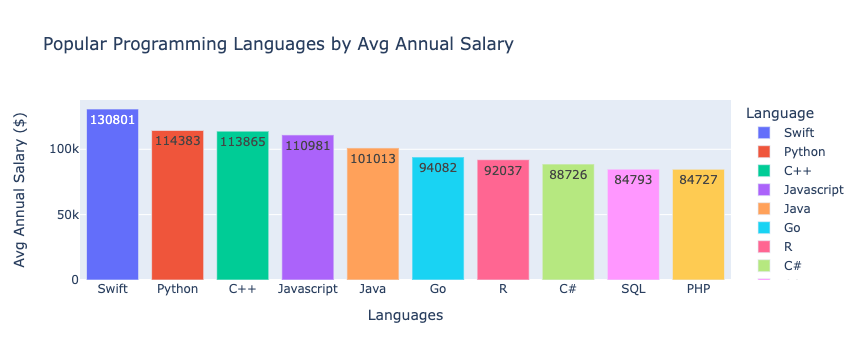

In [112]:
fig = px.bar(df_salary.sort_values(by='Salary', ascending=False), x='Language', y='Salary', color='Language', text='Salary', title='Popular Programming Languages by Avg Annual Salary')
fig.update_yaxes(title='Avg Annual Salary ($)')
fig.update_xaxes(title='Languages')
fig.show()

In [122]:
Loc = [('San Francisco', 435), ('Philadelphia', 41), ('Baltimore', 1263), ('Austin', 434), ('Los Angeles', 640), ('New York', 3226), ('Washington DC', 5316), ('Houston', 3339), ('New Orleons', 817), ('Dallas', 1208), ('Detroit', 3945), ('Seattle', 3375), ('Boston', 2966), ('San Francisco', 435), ('Philadelphia', 41), ('Baltimore', 1263), ('Austin', 434), ('Los Angeles', 640), ('New York', 3226), ('Washington DC', 5316), ('Houston', 3339), ('New Orleons', 817), ('Dallas', 1208), ('Detroit', 3945), ('Seattle', 3375), ('Boston', 2966)]

df_loc = pd.DataFrame(Loc,  columns=['Location', 'Number_of_Jobs'])
df_loc = df_loc.drop_duplicates()
df_loc

,Location,Number_of_Jobs
0,San Francisco,435
1,Philadelphia,41
2,Baltimore,1263
3,Austin,434
4,Los Angeles,640
5,New York,3226
6,Washington DC,5316
7,Houston,3339
8,New Orleons,817
9,Dallas,1208


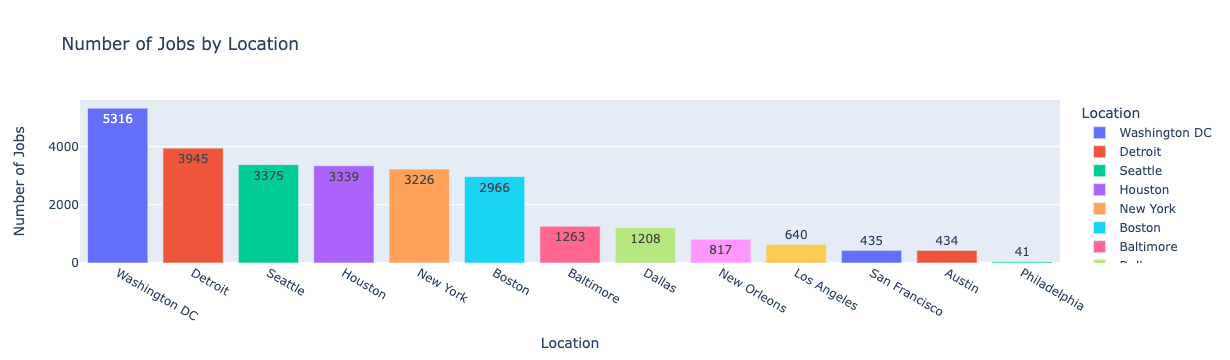

In [127]:
fig = px.bar(df_loc.sort_values(by='Number_of_Jobs', ascending=False), x='Location', y='Number_of_Jobs', color='Location', text='Number_of_Jobs', title='Number of Jobs by Location')
fig.update_yaxes(title= 'Number of Jobs')
fig.show()